In [3]:
# read txt file "pima-indians-diabetes.txt" from data folder into variable data as dataframe
import pandas as pd
data = pd.read_csv("../../data/pima-indians-diabetes.txt", header=None)

# assign column names to the variable data
data.columns = ["pregnant", "plasma_glucose", "blood_pressure", "triceps", "insulin", "bmi", "diabetes_pedigree", "age", "class"]


In [4]:
# print the first 5 rows of the dataframe
print(data.head())

   pregnant  plasma_glucose  blood_pressure  triceps  insulin   bmi  \
0         6             148              72       35        0  33.6   
1         1              85              66       29        0  26.6   
2         8             183              64        0        0  23.3   
3         1              89              66       23       94  28.1   
4         0             137              40       35      168  43.1   

   diabetes_pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  


<AxesSubplot:>

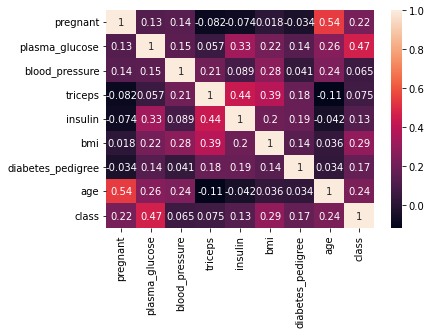

In [5]:
# create a correlation matrix
corr_matrix = data.corr()

# visualize correlation matrix
import seaborn as sns
sns.heatmap(corr_matrix, annot=True)

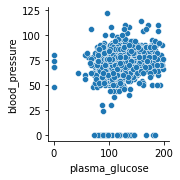

In [6]:
# create a scatter plot of "plasma_glucose" and "blood_pressure"
sns.pairplot(data, x_vars=["plasma_glucose"], y_vars=["blood_pressure"])

In [7]:
# split data in train and test set
from sklearn.model_selection import train_test_split
X = data.drop("class", axis=1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
# print number of 0 and 1 in class variable
print(y_train.value_counts())

0    350
1    187
Name: class, dtype: int64


In [9]:
# Oversample the 1 class in train data
from sklearn.utils import resample
X_resampled, y_resampled = resample(X_train, y_train, replace=True, n_samples=350, random_state=123)

In [10]:
# train an XGBoost Classifier from sklearn with 20 iterations and 0.1 learning rate
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=20, silent=True, objective='binary:logistic')
model.fit(X_resampled, y_resampled)

[20:38:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [1]:
# print the corresponding variable names with the feature importances
for i in range(len(model.feature_importances_)):
    print(X.columns[i], model.feature_importances_[i])

NameError: name 'model' is not defined